In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('tmp_key2.csv')

In [4]:
df.head()

,book_name,book_ratings,book_number_of_reviews,book_price,book_discount,book_author,day,month,year,years_launched,keyword,keyword2
0,Python 3 Object-Oriented Programming: Build ro...,4.4,201,4770,0,by Dusty Phillips,30,October,2018,4,['python object oriented'],['python']
1,Learning RStudio for R Statistical Computing,3.7,13,1828,0,by Mark van der Loo and Edwin de Jonge,24,December,2012,10,['learning rstudio statistical'],['rstudio']
2,Socket.io Real-time Web Application Development,3.2,4,2243,0,by Rohit Rai,22,February,2013,9,['real time web'],['socket']
3,eZ Publish 4: Enterprise Web Sites Step-by-Step,1.0,1,220,0,by Francesco Trucchia and Francesco Fullone,20,October,2009,13,['publish enterprise web'],['publish']
4,Robot Framework Test Automation,2.9,17,1828,0,by Sumit Bisht,25,October,2013,9,['robot framework test'],['automation']


In [5]:
df.shape

(1074, 12)

In [8]:
df['keyword2'].nunique()

413

In [9]:
unique_keywords = df['keyword2'].unique()

In [11]:
df['keyword2'].value_counts()[:20]

['python']           44
['react']            20
['tensorflow']       20
['java']             19
['azure']            18
['analytics']        17
['aws']              16
['devops']           15
['kubernetes']       15
['ai']               14
['angular']          13
['learning']         13
['programming']      12
['unity']            12
['cookbook']         12
['forensics']        11
['microservices']    10
['powershell']       10
['data']             10
['algorithms']       10
Name: keyword2, dtype: int64

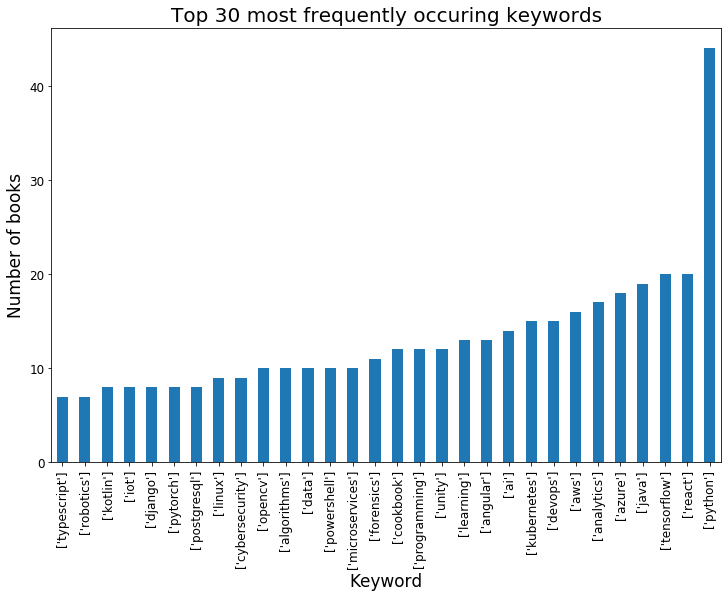

In [72]:
plt.figure(figsize=(12,8))
df.keyword2.value_counts()[:30].sort_values(ascending=True).plot(kind='bar')
plt.title("Top 30 most frequently occuring keywords",fontsize=20)
plt.xlabel("Keyword", fontsize = 17)
plt.ylabel("Number of books", fontsize=17)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

- Python is the most frequently occuring keyword with more than 40 instances.
- Python, React.js, Tensorflow, Java and Azure are trending topics amongst publications.

In [21]:
dat=df[['keyword2','book_ratings']]
words=dat['keyword2'].unique()
bar = pd.DataFrame(columns=["keyword","Avg_rating"])
for i in words[:-1]:
    temp=df[df['keyword2']==i]
#    print(len(temp))
    rating=0
    for index, row in temp.iterrows():
        rating=rating+row['book_ratings']
    bar.loc[len(bar.index)] = [i,rating/len(temp)]

In [22]:
bar

,keyword,Avg_rating
0,['python'],4.188636
1,['rstudio'],3.700000
2,['socket'],3.766667
3,['publish'],1.000000
4,['automation'],3.940000
...,...,...
408,['fcp'],5.000000
409,['code'],4.000000
410,['preprocessing'],4.000000
411,['svg'],5.000000


In [24]:
bar = bar.sort_values('Avg_rating', ascending=False)

In [30]:
bar.reset_index()

,index,keyword,Avg_rating
0,273,['powerpoint'],5.0
1,177,['customization'],5.0
2,374,['blazor'],5.0
3,217,['mysql'],5.0
4,219,['debugging'],5.0
...,...,...,...
408,26,['redis'],2.3
409,316,['bayesian'],2.0
410,3,['publish'],1.0
411,63,['keyshot'],1.0


In [31]:
to_plot = bar[:31]

Text(0.5, 1.0, 'Top 30 most highly rated book categories')

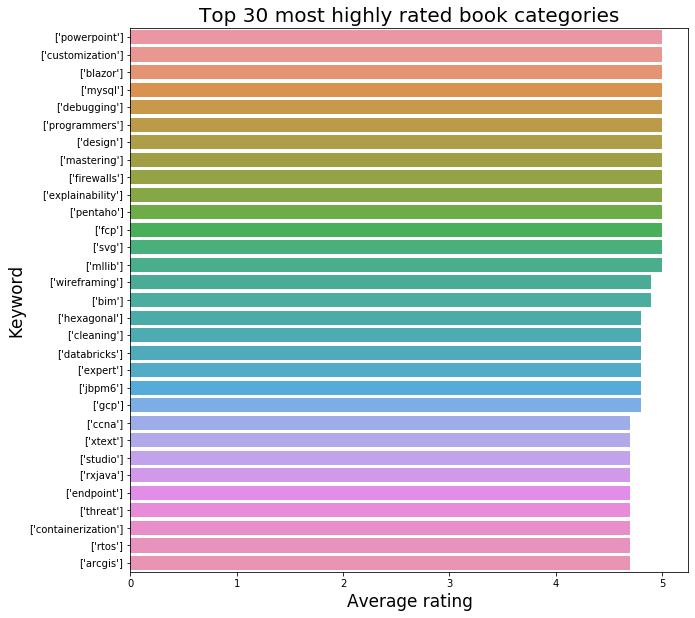

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(x='Avg_rating', y='keyword', data=to_plot, orient='h')
plt.xlabel("Average rating", size=17)
plt.ylabel("Keyword", size=17)
plt.title("Top 30 most highly rated book categories", size=20)

- Powerpoint, MySQL have highest average ratings amongst the keywords.

In [63]:
Avg_price_df = pd.DataFrame(columns=['Category', 'Avg_Price'])

Avg_price_df['Category'] = df['keyword2'].unique()

In [64]:
Avg_price_df

,Category,Avg_Price
0,['python'],NaN
1,['rstudio'],NaN
2,['socket'],NaN
3,['publish'],NaN
4,['automation'],NaN
...,...,...
409,['code'],NaN
410,['preprocessing'],NaN
411,['svg'],NaN
412,['presentation'],NaN


In [66]:
avg_prices = []
for keyword in unique_keywords:
    new_df = df[df['keyword2'] == keyword]
    try:
        avg_prices.append(sum(new_df['book_price'])/len(new_df['book_price']))
    except:
        avg_prices.append(0)

In [67]:
Avg_price_df['Avg_Price'] = avg_prices

In [68]:
Avg_price_df

,Category,Avg_Price
0,['python'],2438.500000
1,['rstudio'],1828.000000
2,['socket'],2122.333333
3,['publish'],220.000000
4,['automation'],2196.400000
...,...,...
409,['code'],2782.000000
410,['preprocessing'],3738.000000
411,['svg'],2782.000000
412,['presentation'],3100.000000


In [69]:
Avg_price_df = Avg_price_df.sort_values('Avg_Price', ascending=False)



Text(0.5, 1.0, 'Top 30 Categories with the highest average prices')

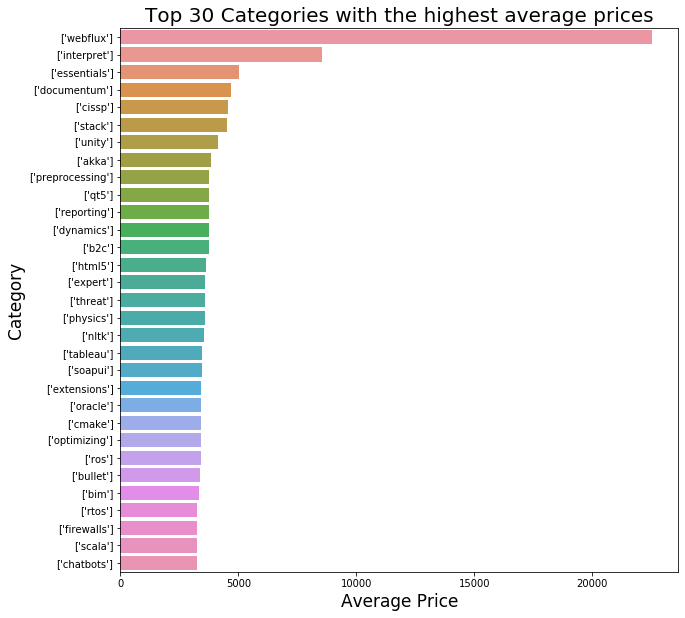

In [71]:
to_plot = Avg_price_df[:31]

plt.figure(figsize=(10,10))
sns.barplot(x='Avg_Price', y='Category', data=to_plot, orient='h')
plt.xlabel("Average Price", size=17)
plt.ylabel("Category", size=17)
plt.title("Top 30 Categories with the highest average prices", size=20)


- The average price of books about 'webflux' is the highest amongst all other categories.

### Conclusions

- Python, React.js, Tensorflow, Java and Azure are trending topics amongst publications.
- Powerpoint, MySQL have highest average ratings amongst the keywords, which means many publications are writing books about these topics.
- The average price of books about 'webflux' is the highest amongst all other categories